In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1

In [ ]:
df_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic.csv')
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Предварительная обработка данных
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])  # Заменяем пол на числовые значения
df['Embarked'] = df['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])  # Заменяем порты на числа
df.head()

<ipython-input-10-ce563190ce63>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])  # Заменяем пол на числовые значения
<ipython-input-10-ce563190ce63>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])  # Заменяем порты на числа


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Удаление ненужных колонок и пропущенных значений
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 50.1 KB


In [ ]:
# Проверка размеров данных
original_data_count = df_orig.size
data_count = df.size
percent_lost_data = (data_count / original_data_count) * 100
print(f"Размер данных до обработки: {original_data_count}, после: {data_count}")
print(f"Процент потерянных данных: {percent_lost_data:.2f}%")

Размер данных до обработки: 10692, после: 5696
Процент потерянных данных: 53.27%


In [ ]:
# Разделение данных на признаки (X) и метки (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Логистическая регрессия
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Метрики производительности для логистической регрессии
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [ ]:
# Получаем коэффициенты модели
coefficients = model.coef_
# Получаем имена признаков
feature_names = X_train.columns

# Создаем словарь с коэффициентами и их именами признаков
coefficients_dict = dict(zip(feature_names, coefficients[0]))

# Выводим коэффициенты для признака Embarked
print("Коэффициенты для признака Embarked:")
print(coefficients_dict['Embarked'])

Коэффициенты для признака Embarked:
-0.1152252698589522


Чем больше по модулю значение коэффициента, тем более значим признак для модели.
Если коэффициент положительный, то увеличение значения признака Embarked повышает вероятность принадлежности к целевому классу.
Если коэффициент отрицательный, то увеличение значения признака Embarked снижает вероятность принадлежности к целевому классу.
В нашем случае коэффициент понижает точность.

In [ ]:
# Метрики для более глубокого анализа
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.85, Recall: 0.65, F1 Score: 0.74


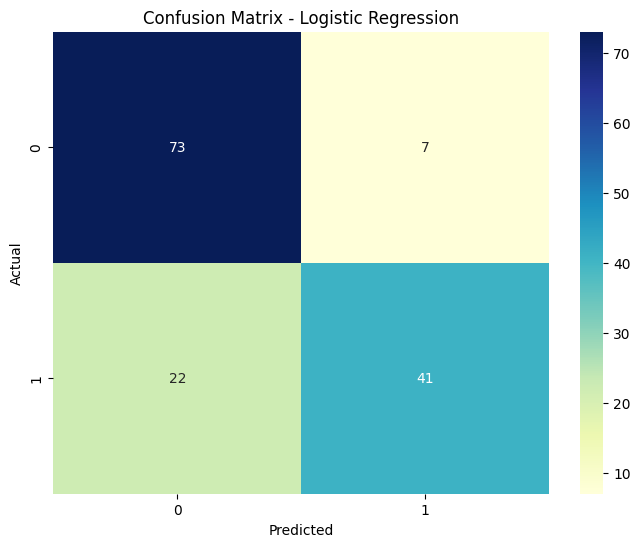

In [ ]:
# Отображение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

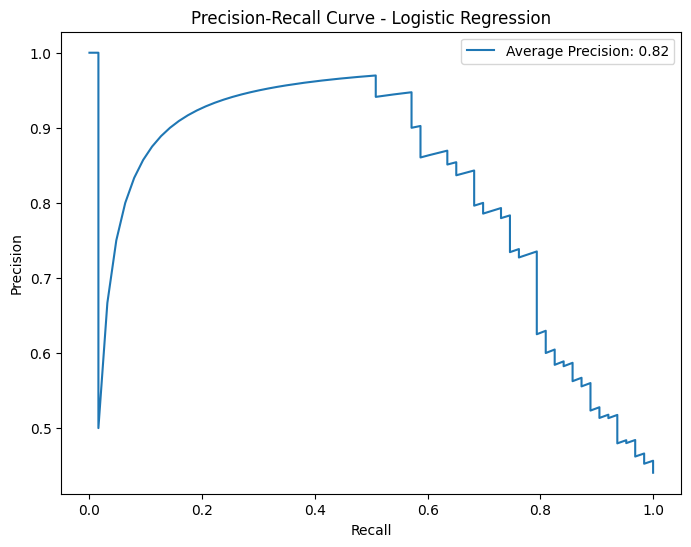

In [ ]:
# Precision-Recall Curve для логистической регрессии
y_prob = model.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
average_precision = average_precision_score(y_test, y_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='best')
plt.show()

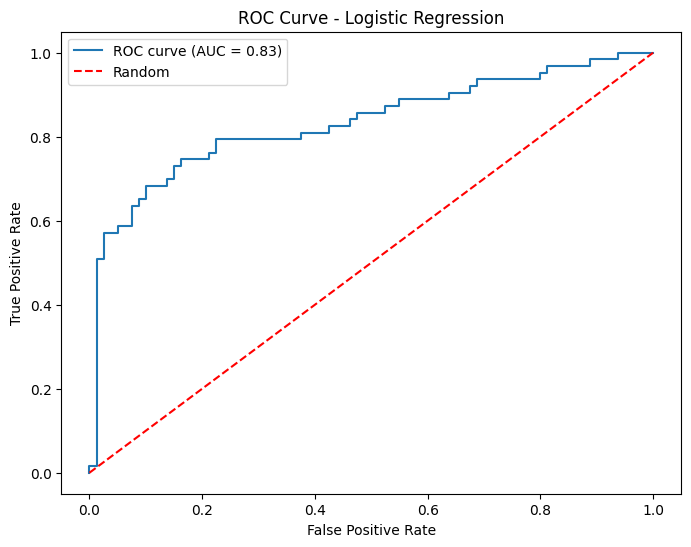

In [ ]:
# ROC Curve для логистической регрессии
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='best')
plt.show()

# 2

In [ ]:
svm_model = SVC()
knn_model = KNeighborsClassifier()

In [ ]:
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Метрики для SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Метрики для модели KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

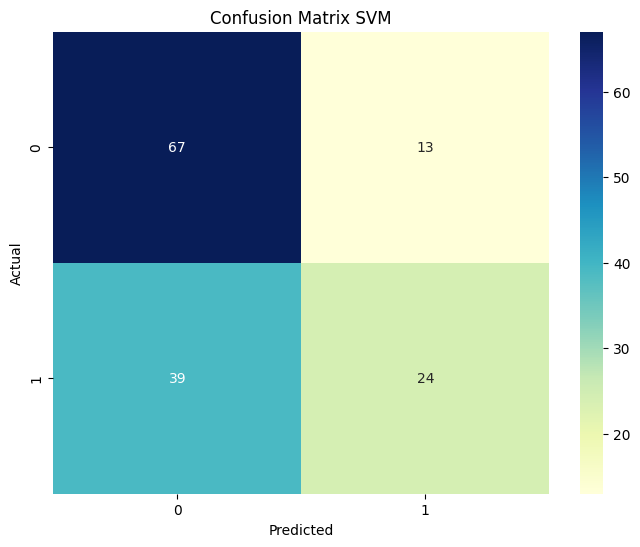

In [ ]:
# Тепловая карта для модели SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

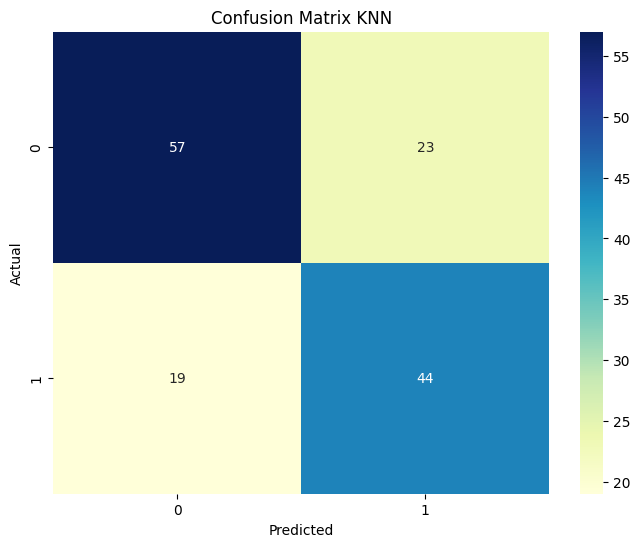

In [ ]:
# Тепловая карта для модели KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

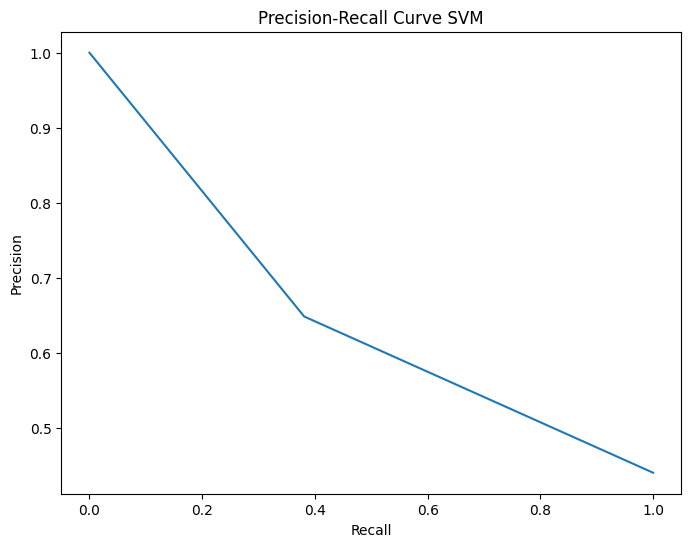

In [ ]:
# Кривая PR для модели SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve SVM')
plt.show()

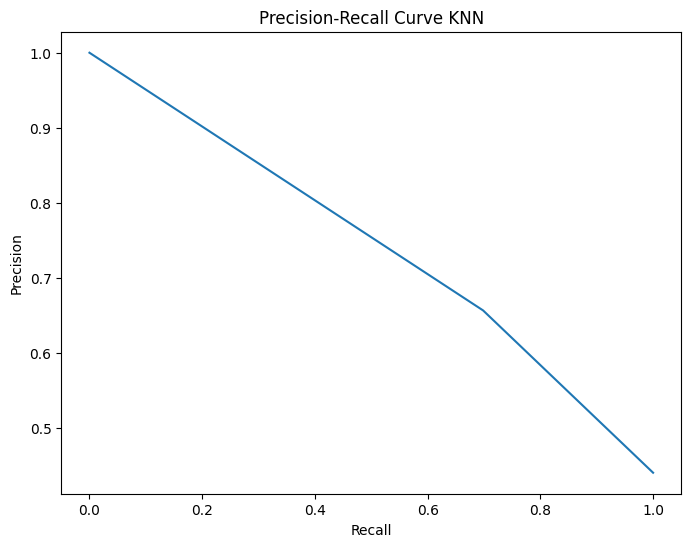

In [ ]:
# Кривая PR для модели KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve KNN')
plt.show()

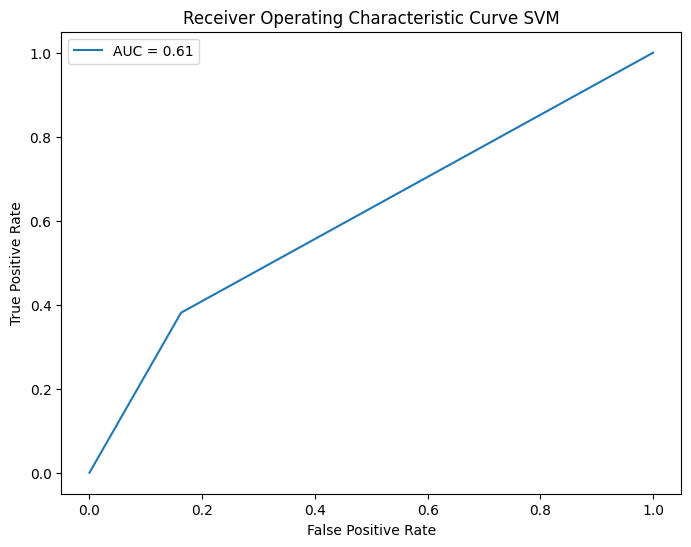

In [ ]:
# Кривая ROC для модели SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {roc_auc_svm:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve SVM')
plt.legend(loc='best')
plt.show()

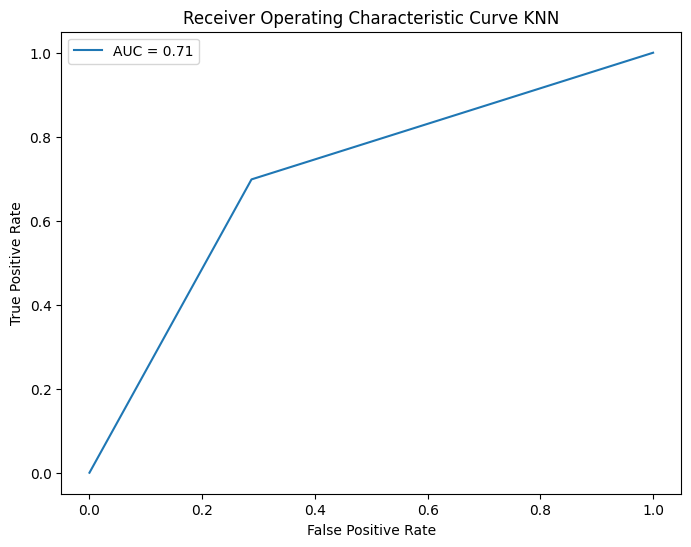

In [ ]:
# Кривая ROC для модели KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {roc_auc_knn:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve KNN')
plt.legend(loc='best')
plt.show()

In [ ]:
# Сравнение всех моделей по метрикам
print("\nМетрики для моделей:")
print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm}, Recall: {recall_svm}, F1: {f1_svm}")
print(f"KNN - Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn}, Recall: {recall_knn}, F1: {f1_knn:}")


Метрики для моделей:
SVM - Accuracy: 0.64, Precision: [0.44055944 0.64864865 1.        ], Recall: [1.         0.38095238 0.        ], F1: 0.48
KNN - Accuracy: 0.71, Precision: [0.44055944 0.65671642 1.        ], Recall: [1.        0.6984127 0.       ], F1: 0.676923076923077
